In [3]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM
import seaborn as sns

In [5]:
df = pd.read_csv('gold data.xlsx - FRED Graph.csv')

In [6]:
df.head()

Unnamed: 0        Unnamed: 1
0               NaN               NaN
1  observation_date  GOLDAMGBD228NLBM
2        1968-04-01            38.000
3        1968-04-02            37.600
4        1968-04-03            37.700

In [36]:
df.tail()

1     observation_date  GOLDAMGBD228NLBM
13903       2021-07-15       1832.000000
13904       2021-07-16       1822.000000
13905       2021-07-19       1803.250000
13906       2021-07-20       1815.300049
13907       2021-07-21       1805.900024

In [7]:
df.shape

(13910, 2)

In [8]:
df.isna().sum()


Unnamed: 0      1
Unnamed: 1    432
dtype: int64

In [9]:

df.columns=df.iloc[1]

df.drop([0,1],inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

1 observation_date GOLDAMGBD228NLBM
0       1968-04-01           38.000
1       1968-04-02           37.600
2       1968-04-03           37.700
3       1968-04-04           36.700
4       1968-04-05           37.200

In [10]:
df.isna().sum()

1
observation_date      0
GOLDAMGBD228NLBM    431
dtype: int64

In [11]:
df.columns

Index(['observation_date', 'GOLDAMGBD228NLBM'], dtype='object', name=1)

In [12]:
df["GOLDAMGBD228NLBM"].fillna( method ='backfill', inplace = True)

In [13]:
df.shape

(13908, 2)

In [14]:
df['GOLDAMGBD228NLBM'].describe()

count      13908
unique      7840
top       35.000
freq          21
Name: GOLDAMGBD228NLBM, dtype: object

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13908 entries, 0 to 13907
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  13908 non-null  datetime64[ns]
 1   GOLDAMGBD228NLBM  13908 non-null  float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 163.1 KB


In [135]:
df['observation_date']=pd.to_datetime(df['observation_date']).dt.date

In [73]:
df['GOLDAMGBD228NLBM']=df['GOLDAMGBD228NLBM'].astype('float32')

In [74]:
df.describe().transpose().T.style.set_properties(**{"background-color": "#AB8111", "font-size" : "17px",
                                        "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

In [75]:
max_value = df['GOLDAMGBD228NLBM'].max()
df[df['GOLDAMGBD228NLBM']==max_value]

1     observation_date  GOLDAMGBD228NLBM
13659       2020-08-07            2061.5

In [76]:
min_value=df['GOLDAMGBD228NLBM'].min()
df[df['GOLDAMGBD228NLBM']==min_value]

1   observation_date  GOLDAMGBD228NLBM
469       1970-01-16         34.775002
470       1970-01-19         34.775002

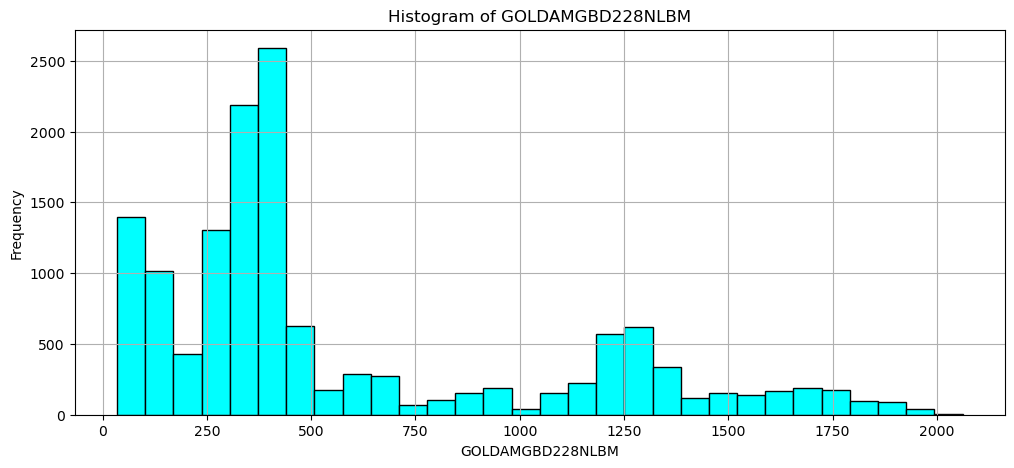

In [77]:
df['GOLDAMGBD228NLBM'].hist(figsize=(12, 5),
                            bins=30,  # Number of bins
                            color='cyan',  # Color of the bars
                            edgecolor='black'  # Color of the edges of the bars
                           )
plt.xlabel('GOLDAMGBD228NLBM')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.title('Histogram of GOLDAMGBD228NLBM')  # Title of the plot
plt.grid(True)  # Display grid
plt.show()  # Display the histogram

<Axes: xlabel='GOLDAMGBD228NLBM', ylabel='Density'>

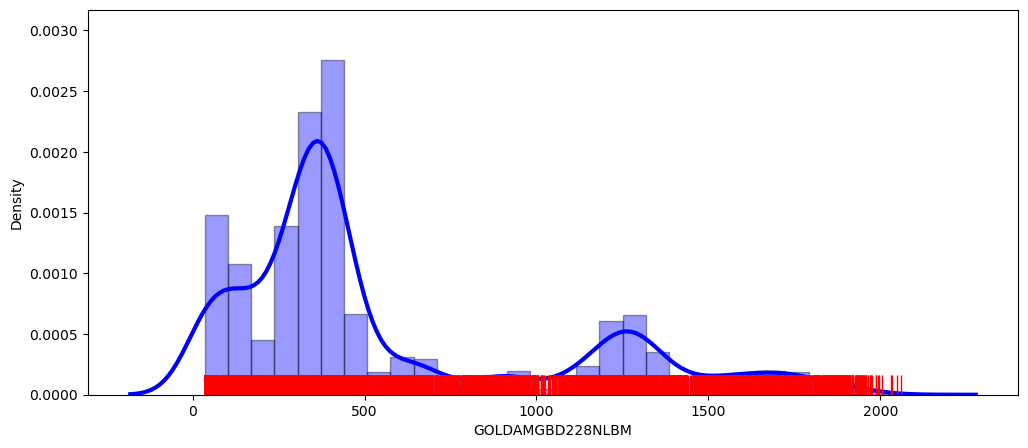

In [78]:
plt.figure(figsize=(12,5))
sns.distplot(df['GOLDAMGBD228NLBM'], 
             bins=30, 
             hist=True, 
             kde=True,
             rug=True,  # Adds a rug plot along the x-axis
             color='blue',  # Sets the color of the histogram and KDE curve
             hist_kws={'edgecolor':'black'},  # Sets the color of the histogram edges
             kde_kws={'linewidth': 3},  # Sets the width of the KDE curve
             rug_kws={'color': 'red', 'height': 0.05}  # Sets the color and height of the rug plot
            )

In [79]:
fig = px.line(y=df['GOLDAMGBD228NLBM'], x=df['observation_date'])
plt.figure(figsize=(12,4))
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Date", 
                  yaxis_title="Scaled Price",
                  title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')


<Figure size 1200x400 with 0 Axes>

In [80]:
round(df.describe(),3)

1      GOLDAMGBD228NLBM
count         13908.000
mean            573.322
std             485.394
min              34.775
25%             281.700
50%             383.475
75%             827.750
max            2061.500

In [81]:
df["year"]=pd.DatetimeIndex(df["observation_date"]).year
df["month"]=pd.DatetimeIndex(df["observation_date"]).month

In [82]:
df.head()

1 observation_date  GOLDAMGBD228NLBM  year  month
0       1968-04-01         38.000000  1968      4
1       1968-04-02         37.599998  1968      4
2       1968-04-03         37.700001  1968      4
3       1968-04-04         36.700001  1968      4
4       1968-04-05         37.200001  1968      4

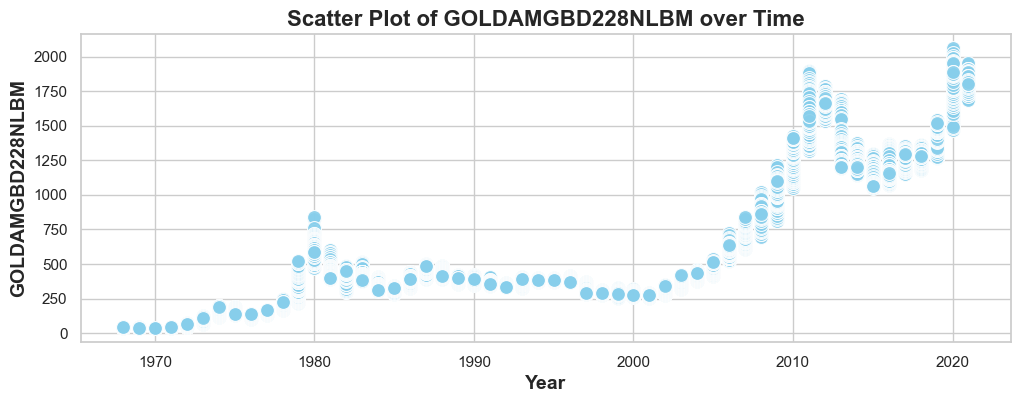

In [89]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,4))
# Create the scatter plot
sns.scatterplot(x=df.year, y=df.GOLDAMGBD228NLBM, color='skyblue', s=100, alpha=0.9)

# Add labels and title
plt.xlabel('Year', fontsize=14, fontweight='bold')  # X-axis label
plt.ylabel('GOLDAMGBD228NLBM', fontsize=14, fontweight='bold')  # Y-axis label
plt.title('Scatter Plot of GOLDAMGBD228NLBM over Time', fontsize=16, fontweight='bold')  # Plot title

# Show the plot
plt.show()

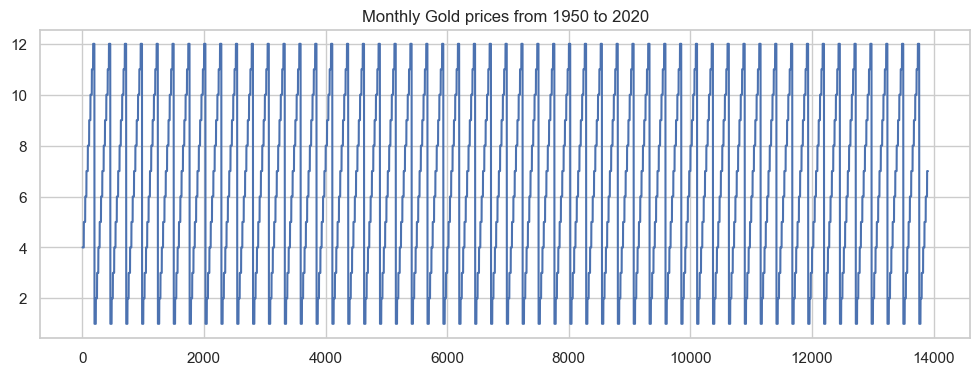

In [91]:
plt.figure(figsize=(12,4))
df['month'].plot(kind = 'line', title = "Monthly Gold prices from 1950 to 2020")
plt.show()

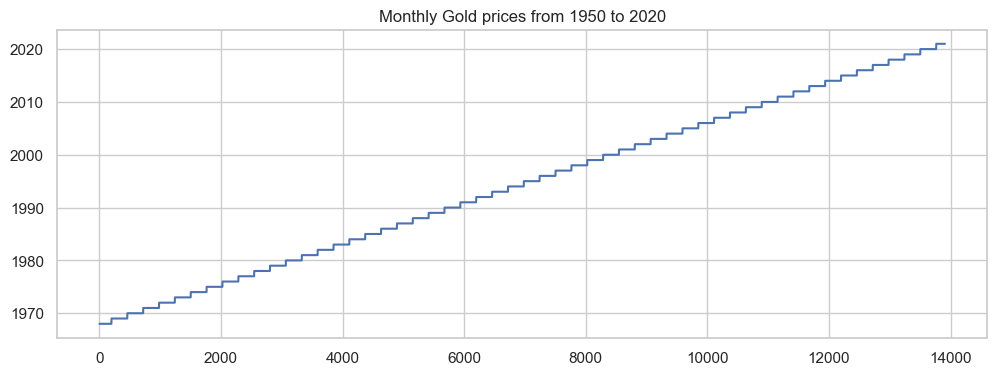

In [92]:
#
plt.figure(figsize=(12,4))
df['year'].plot(kind = 'line', title = "Monthly Gold prices from 1950 to 2020")
plt.show()

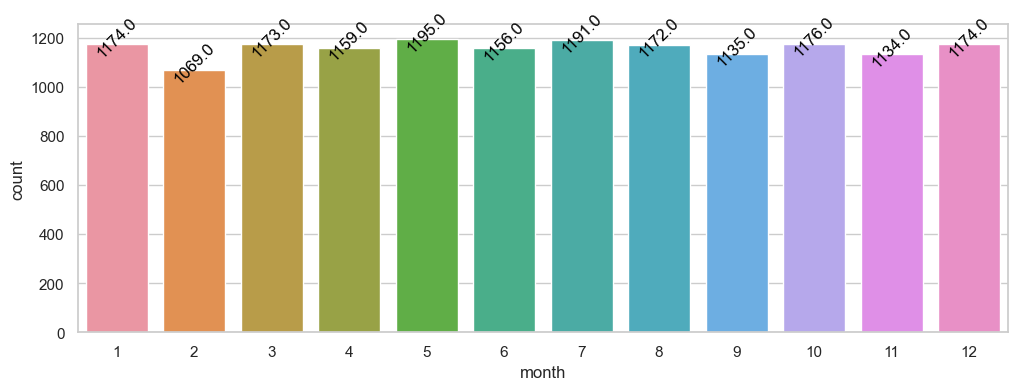

In [99]:
plt.figure(figsize=(12,4))
ax=sns.countplot(x="month",data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points',rotation=45)
plt.show()

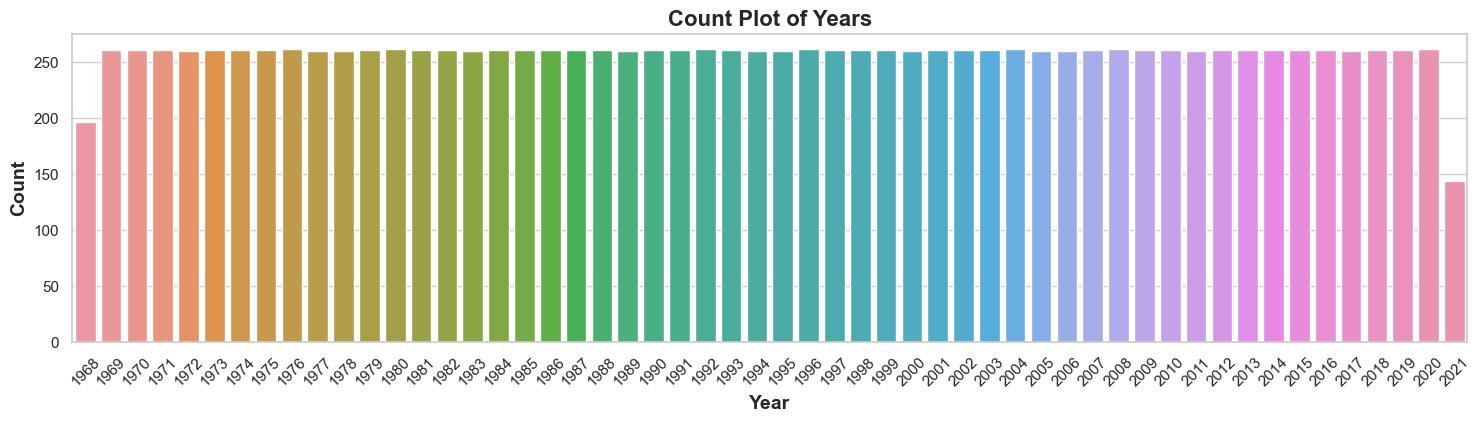

In [105]:
plt.figure(figsize=(18,4))

# Create the count plot
ax=sns.countplot(x="year", data=df)

    

# Add labels and title
plt.xlabel('Year', fontsize=14,  fontweight='bold')  # X-axis label
plt.ylabel('Count', fontsize=14, fontweight='bold')  # Y-axis label
plt.title('Count Plot of Years', fontsize=16, fontweight='bold')  # Plot title
plt.xticks(rotation=45)

# Show the plot
plt.show()

<Axes: xlabel='month', ylabel='GOLDAMGBD228NLBM'>

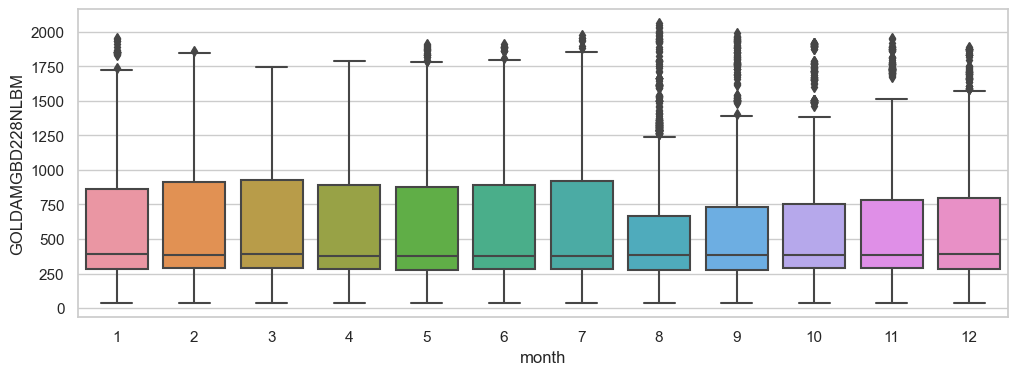

In [108]:
plt.figure(figsize=(12,4))
sns.boxplot(x="month",y="GOLDAMGBD228NLBM",data=df)

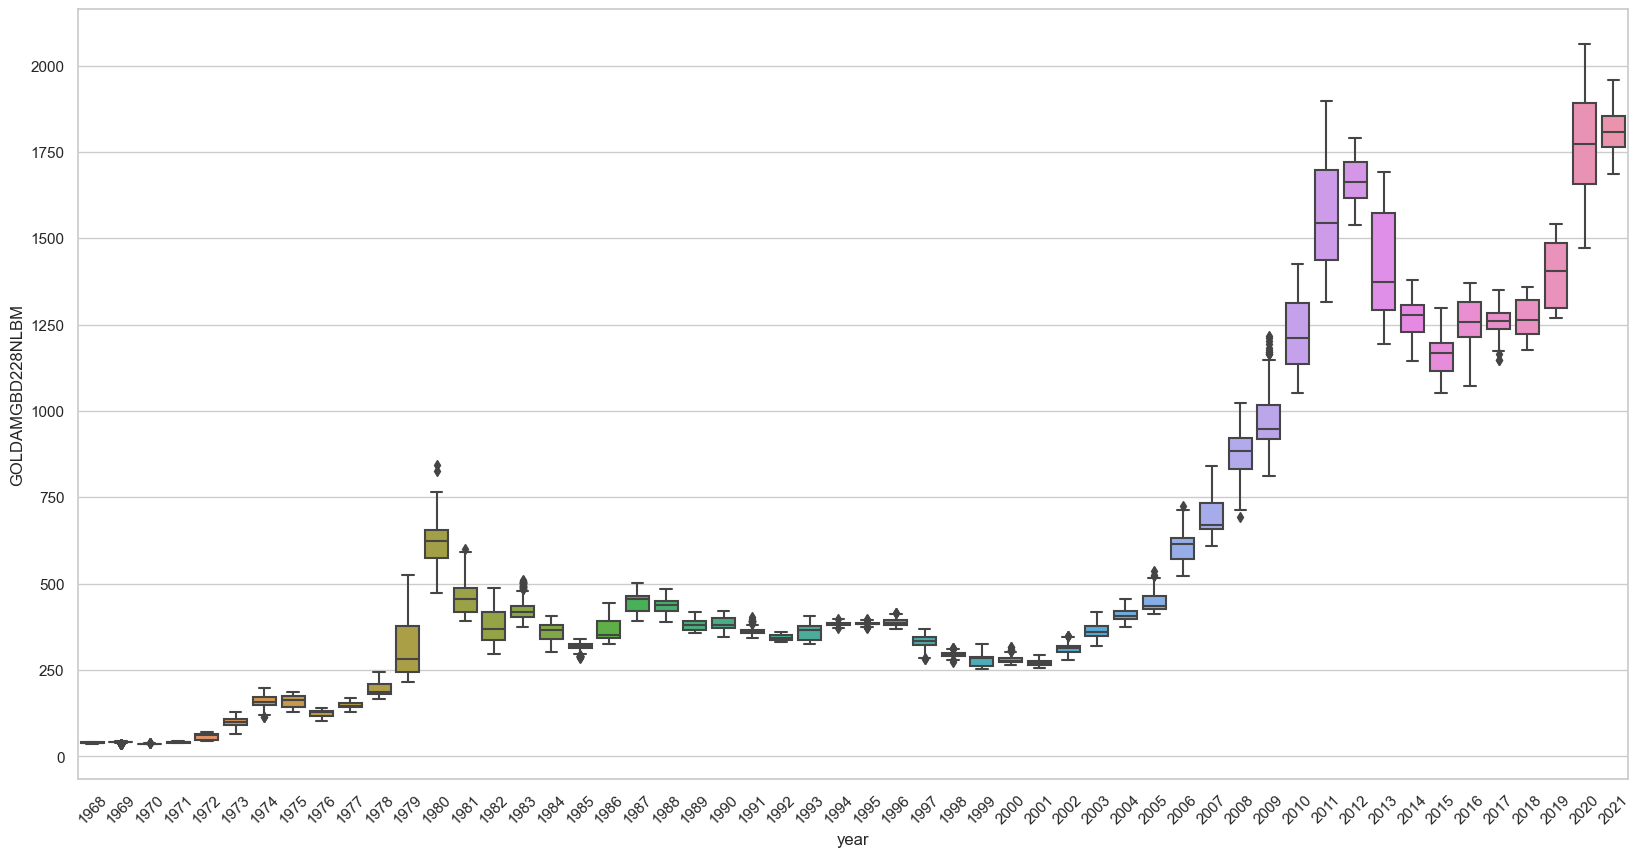

In [115]:
plt.figure(figsize=(20,10))
sns.boxplot(x="year",y="GOLDAMGBD228NLBM",data=df)
plt.xticks(rotation=45)
plt.show()

In [116]:
pd.pivot_table(data=df,values="GOLDAMGBD228NLBM",index="year",columns="month",aggfunc="mean",fill_value=0)
#sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

month           1            2            3            4            5   \
year                                                                     
1968      0.000000     0.000000     0.000000    37.897728    40.691303   
1969     42.269566    42.616249    43.171429    43.299999    43.462498   
1970     34.954090    34.993752    35.107727    35.623409    35.953094   
1971     37.841667    38.716000    38.872826    38.991817    40.509525   
1972     45.640240    48.236668    48.293262    48.994751    54.682606   
1973     65.120872    73.971252    84.104683    90.484528   101.910866   
1974    128.406525   150.000000   168.297623   172.379547   163.282608   
1975    177.217392   179.552505   178.111908   170.065903   167.540909   
1976    132.088638   130.940002   132.676086   127.918182   126.871429   
1977    132.486908   136.162506   148.339127   149.214279   146.536362   
1978    172.997726   178.360001   183.721741   175.322495   176.123917   
1979    226.993484   245.589996   242.347717   238.466660   258.208679   
1980    669.554321   665.892883   554.276184   516.863647   514.411377   
1981    560.920471   500.799988   499.693176   495.204559   479.583344   
1982    384.869049   374.457489   330.217377   350.531830   334.195251   
1983    480.452393   493.487488   420.706512   432.464294   437.174988   
1984    371.337494   386.038086   394.743164   381.678558   377.091278   
1985    303.000000   300.332489   303.204742   324.720459   316.063049   
1986    344.758698   339.052490   344.914307   340.715912   342.236359   
1987    408.245483   401.044983   408.847748   440.995483   461.690491   
1988    478.059509   442.123779   443.491302   451.980927   451.122742   
1989    404.861359   387.972504   390.358704   384.720001   371.189117   
1990    409.750000   416.542480   393.661346   374.826202   368.973938   
1991    384.934784   363.747498   363.128571   358.047729   357.043488   
1992    354.295654   353.852478   344.640900   338.679565   337.011902   
1993    329.011902   329.309998   329.973907   341.493195   366.928558   
1994    387.485718   381.657501   384.000000   378.811890   381.309082   
1995    378.859100   376.744995   381.819550   391.614990   385.471710   
1996    398.191315   404.919037   396.511902   393.299988   392.073914   
1997    355.580444   346.399994   352.076202   344.706818   344.015900   
1998    289.193176   297.742493   295.870453   308.643188   299.214294   
1999    287.376190   287.494995   286.243469   282.231812   276.799988   
2000    284.469055   300.854767   286.704346   279.964996   275.241302   
2001    266.232605   262.017517   263.272736   260.883331   271.976105   
2002    281.604340   295.682495   294.747620   302.852264   314.399994   
2003    356.226105   359.575012   341.564301   328.665894   355.595459   
2004    414.527252   404.730011   405.976105   405.995483   384.795258   
2005    424.209534   423.429993   433.710846   429.140472   422.915924   
2006    548.129517   555.517456   557.215210   612.342468   674.876099   
2007    630.804321   665.102478   655.890869   679.707153   668.608704   
2008    885.739136   924.283325   967.207153   911.599976   890.193176   
2009    858.272705   939.762512   925.988647   892.875000   926.440491   
2010   1119.261963  1095.800049  1115.554321  1146.250000  1204.099976   
2011   1362.619019  1371.312500  1422.847778  1480.773804  1514.875000   
2012   1653.090942  1743.095215  1675.056763  1648.083374  1586.934814   
2013   1672.304321  1630.687500  1591.333374  1490.988647  1416.565186   
2014   1242.054321  1298.712524  1336.559570  1298.409058  1289.534058   
2015   1246.375000  1231.099976  1180.636353  1199.184082  1197.019043   
2016   1094.561890  1194.892822  1243.715210  1241.452393  1259.186401   
2017   1190.647705  1233.390015  1231.063110  1268.934937  1246.471680   
2018   1331.939087  1333.775024  1326.063599  1334.483398  1303.823853   
2019   1291.437012  1319.755005  1302.285767  1286.359131  1283.060913   
2020

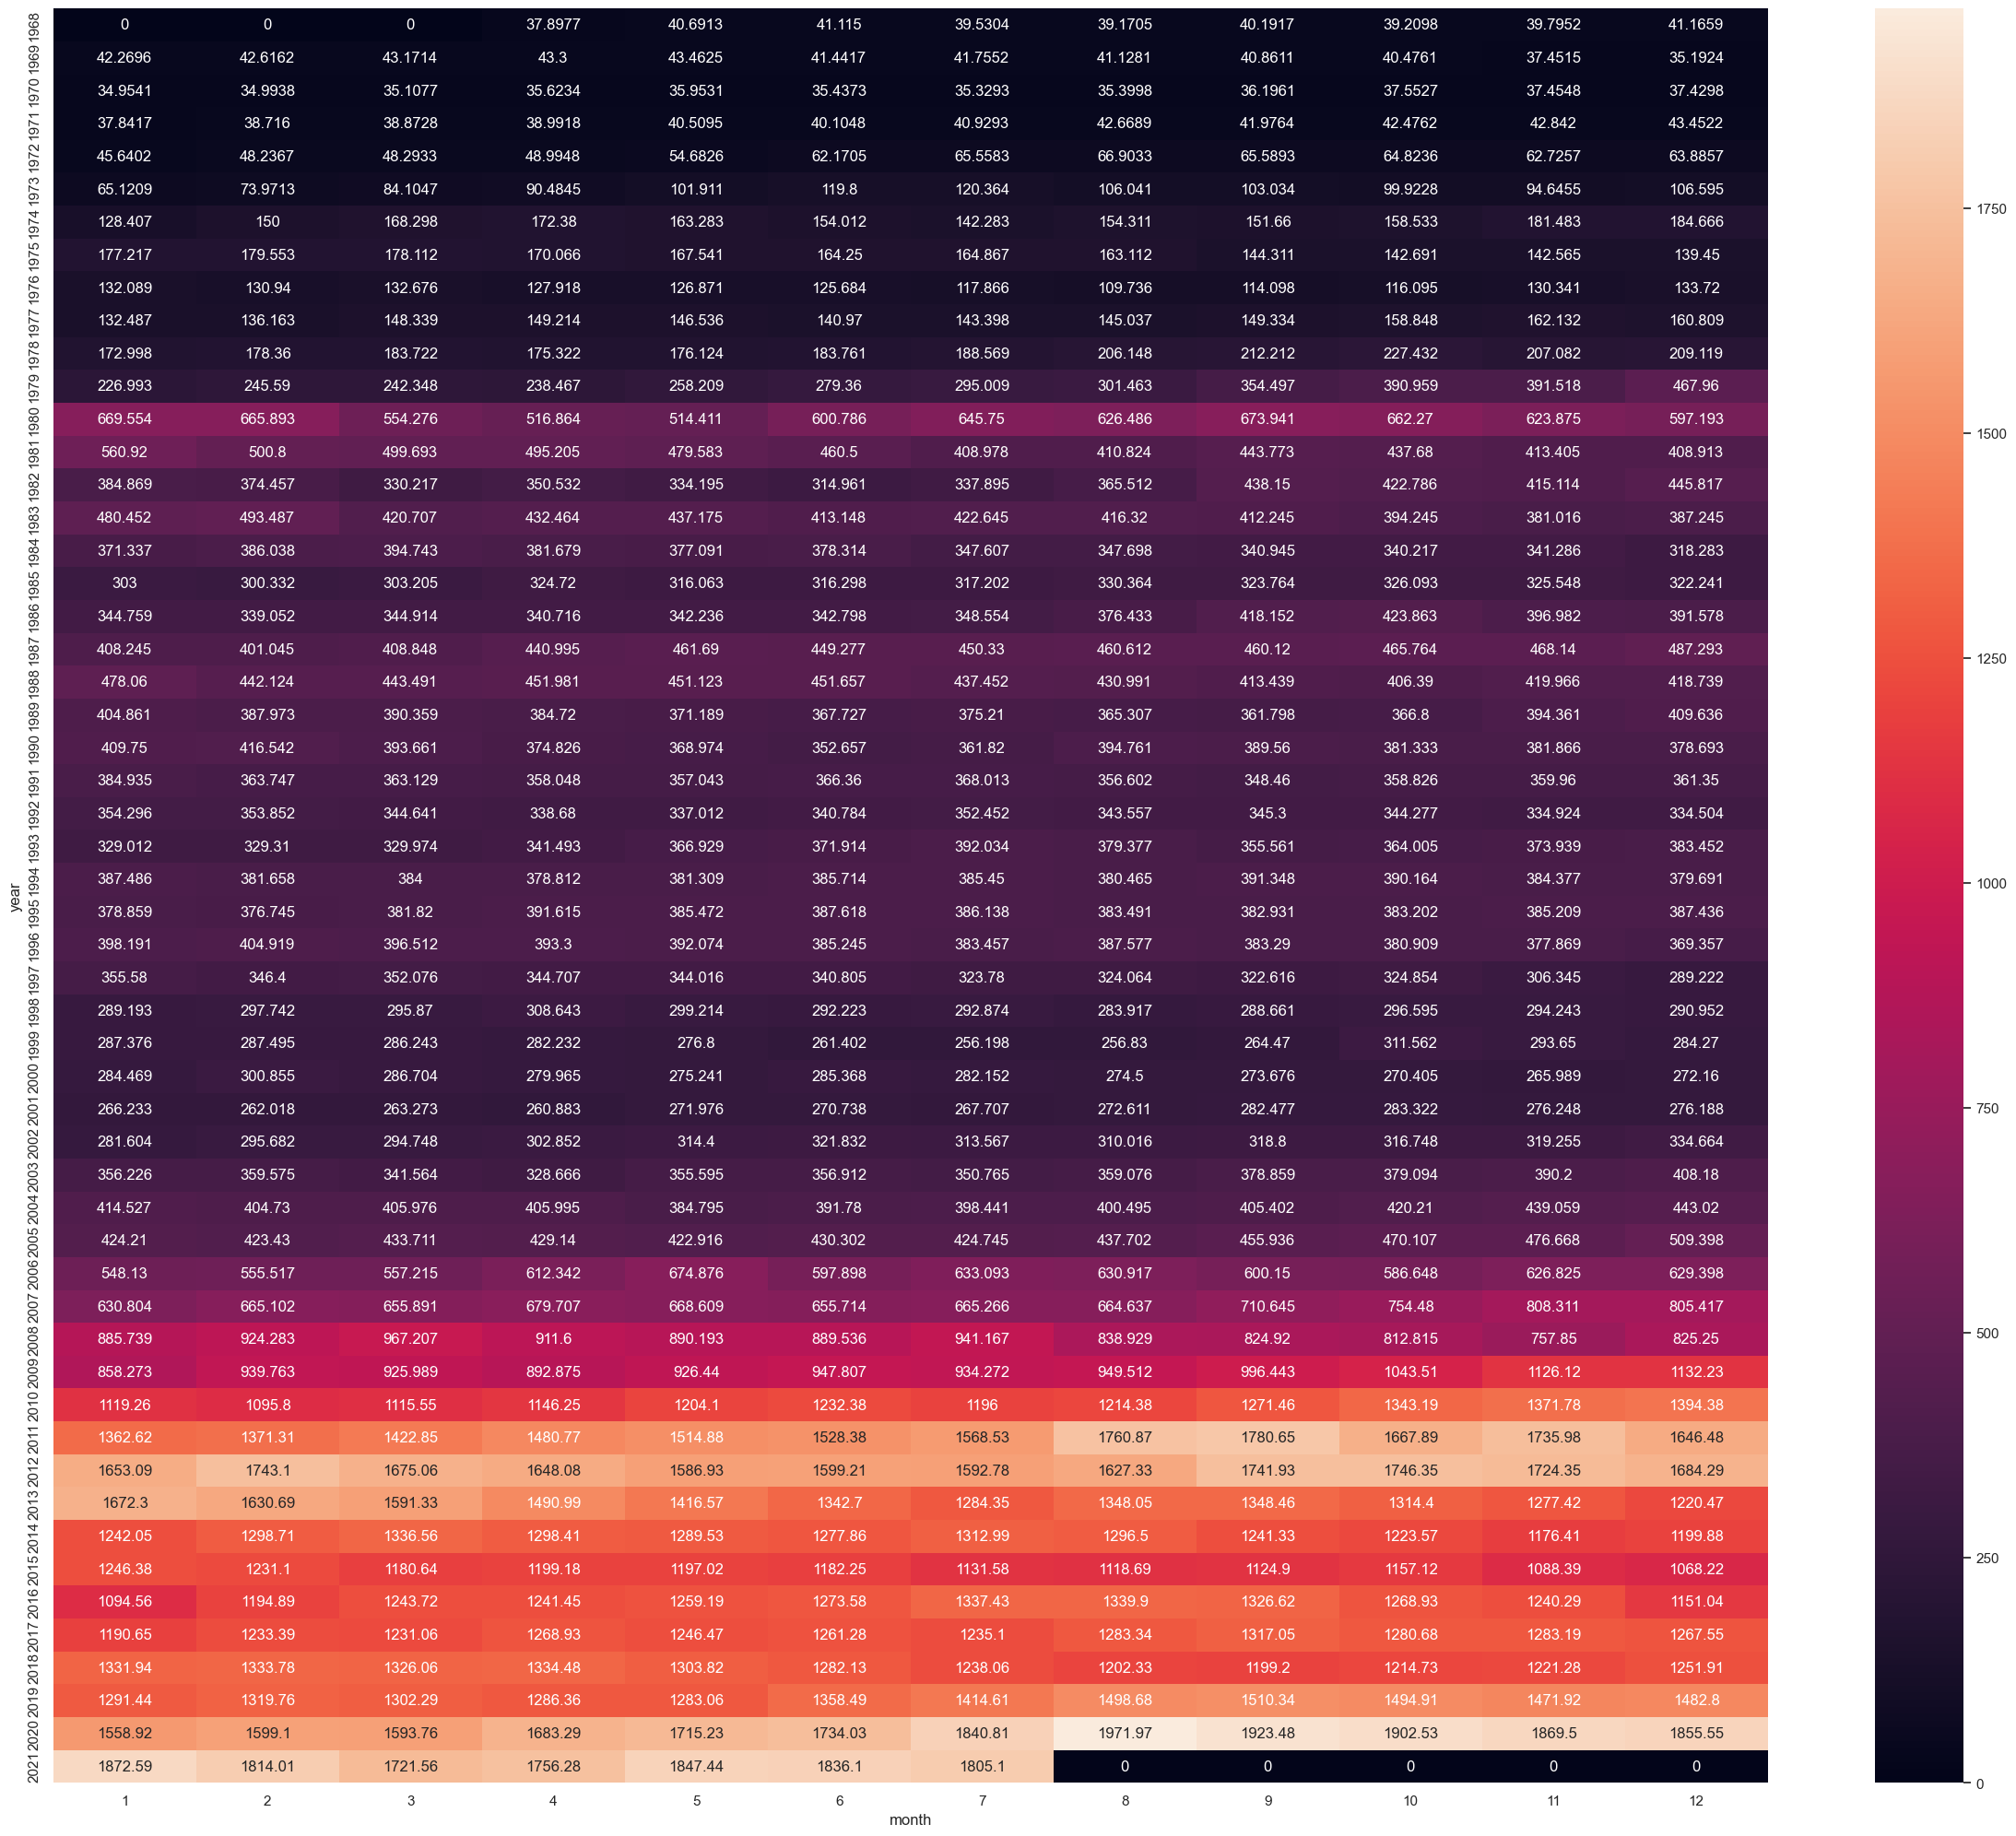

In [122]:
plt.figure(figsize=(30,25))
heatmap_y_month = pd.pivot_table(data=df,values="GOLDAMGBD228NLBM",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.yticks(rotation=90)
plt.show()

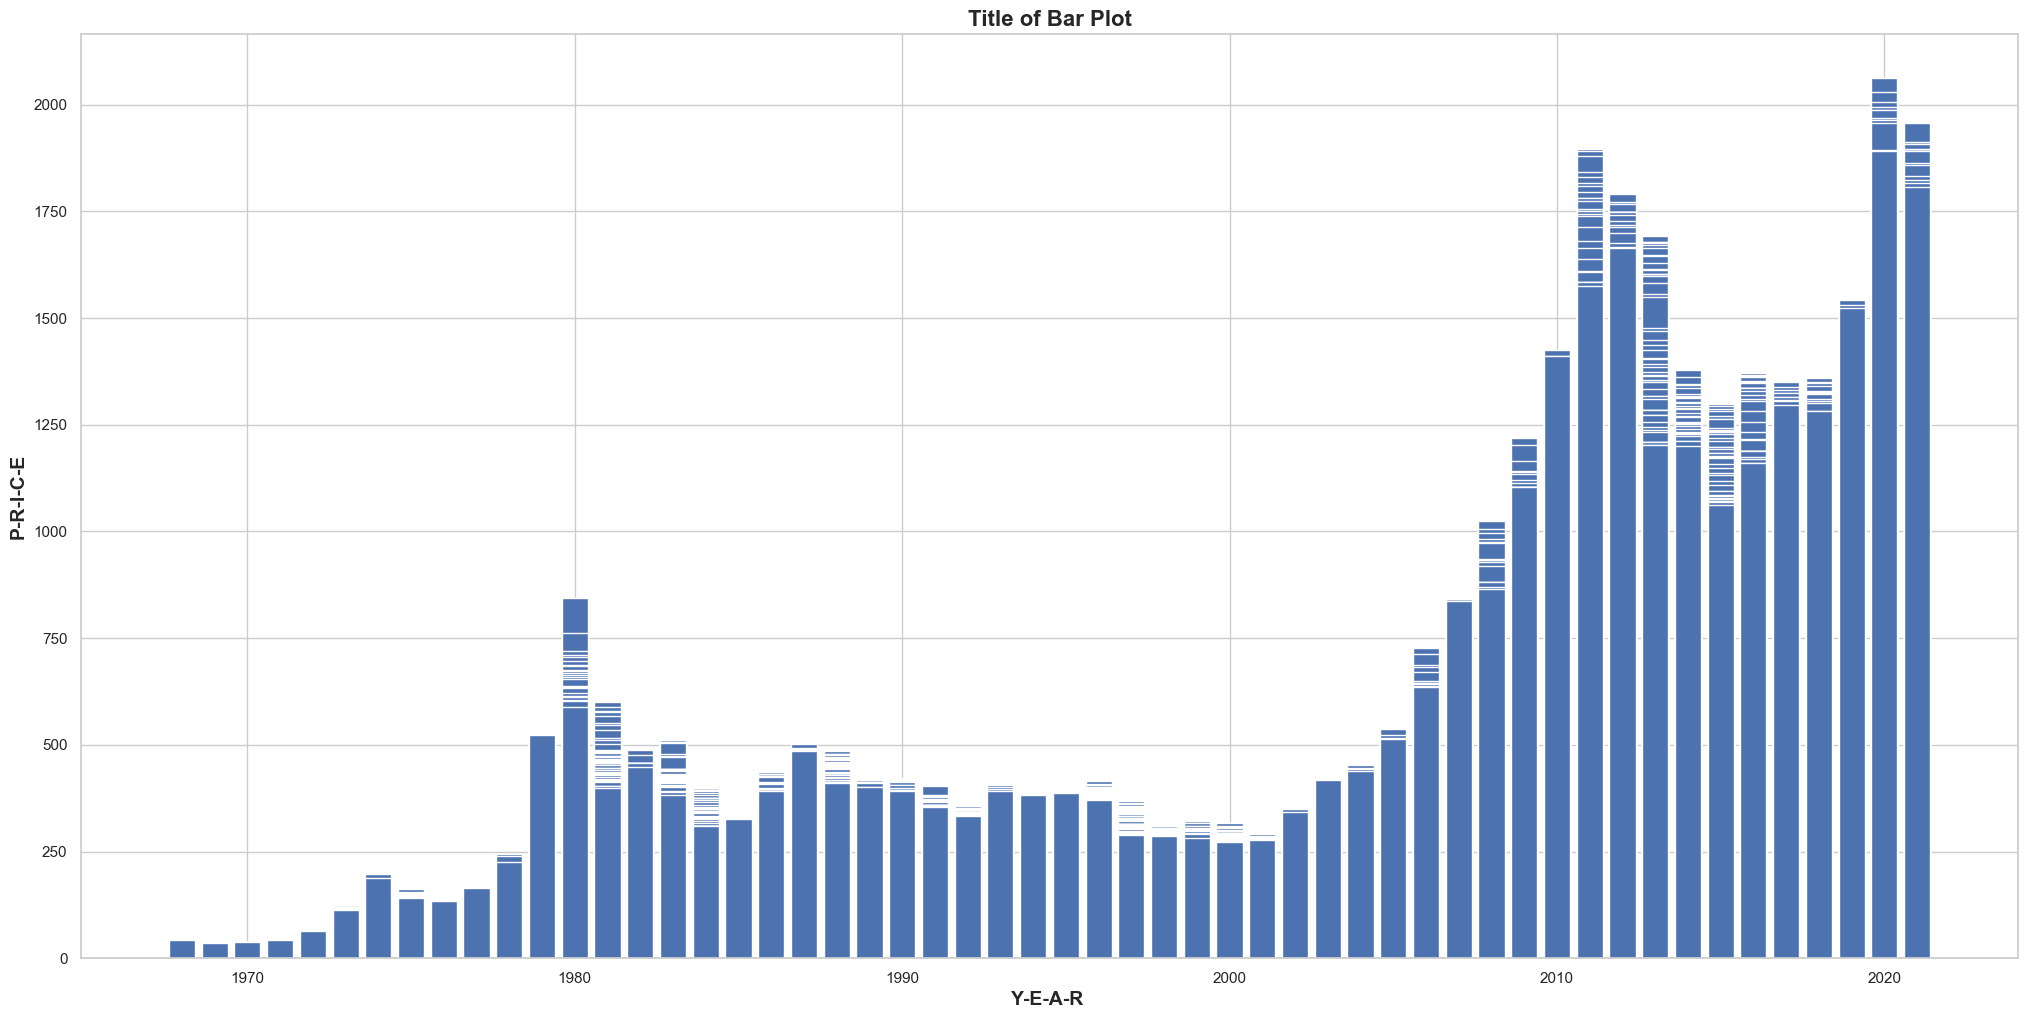

In [126]:
x=df.year
y=df.GOLDAMGBD228NLBM

plt.figure(figsize=(25,12))
plt.bar(x,y)


# Add labels and title
plt.xlabel('Y-E-A-R ', fontsize=14, fontweight='bold')  # X-axis label
plt.ylabel('P-R-I-C-E', fontsize=14, fontweight='bold')  # Y-axis label
plt.title('Title of Bar Plot', fontsize=16, fontweight='bold')  # Plot title

plt.show()

In [128]:
sns.pairplot(df, 
             hue="GOLDAMGBD228NLBM",  # Color by this variable
             diag_kind='kde',         # Use kernel density estimate plots on the diagonal
             markers=['o', 's', 'D'],  # Use different markers for hue levels
             plot_kws={'alpha': 0.5},  # Set transparency level of the scatter plot points
             diag_kws={'shade': True}  # Shade the KDE plots on the diagonal
            )


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000013A886FE0C0> (for post_execute):


KeyboardInterrupt: 

In [132]:
fig = px.line(y=df['GOLDAMGBD228NLBM'], x=df['year'])
plt.figure(figsize=(12,4))
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Date", 
                  yaxis_title="Scaled Price",
                  title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')


<Figure size 1200x400 with 0 Axes>

In [141]:
#df['observation_date'] = pd.to_datetime(df['observation_date'])

start_date = "1968-01-01"
end_date = '1987-12-30'
selected_data = df.loc[(df['observation_date'] >= start_date) & (df['observation_date'] <= end_date)]
selected_data

1    observation_date  GOLDAMGBD228NLBM  year  month
0          1968-04-01         38.000000  1968      4
1          1968-04-02         37.599998  1968      4
2          1968-04-03         37.700001  1968      4
3          1968-04-04         36.700001  1968      4
4          1968-04-05         37.200001  1968      4
...               ...               ...   ...    ...
5148       1987-12-24        483.750000  1987     12
5149       1987-12-25        489.549988  1987     12
5150       1987-12-28        489.549988  1987     12
5151       1987-12-29        489.549988  1987     12
5152       1987-12-30        486.899994  1987     12

[5153 rows x 4 columns]

In [144]:
selected_data.loc[selected_data["GOLDAMGBD228NLBM"]==selected_data["GOLDAMGBD228NLBM"].max()]

1    observation_date  GOLDAMGBD228NLBM  year  month
3080       1980-01-21             843.0  1980      1

In [145]:
selected_data.loc[selected_data["GOLDAMGBD228NLBM"]==selected_data["GOLDAMGBD228NLBM"].min()]

1   observation_date  GOLDAMGBD228NLBM  year  month
469       1970-01-16         34.775002  1970      1
470       1970-01-19         34.775002  1970      1

Text(0.5, 1.0, 'GOLD-PRICE')

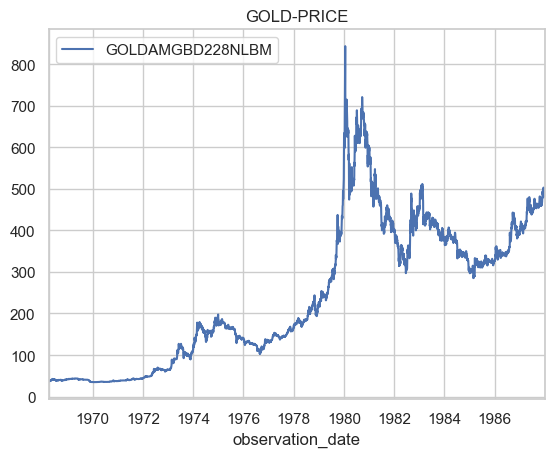

In [148]:
plt.figr
selected_data.plot(x='observation_date',y='GOLDAMGBD228NLBM')
plt.title('GOLD-PRICE')

In [154]:
fig = px.line(y=selected_data['GOLDAMGBD228NLBM'], x=selected_data['observation_date'])
plt.figure(figsize=(12,4))
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Date", 
                  yaxis_title="Scaled Price",
                  title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')


<Figure size 1200x400 with 0 Axes>

In [156]:
# In this case, I select the data from 1978-01-01 to 1987-12-30 and gold as my input
start_date = "1978-01-01"
end_date = "1987-12-30"
commodity_type = "Gold"
df2=df.loc[(df['observation_date'] >= start_date) & (df['observation_date'] <= end_date)]

In [161]:
df2.loc[df2["GOLDAMGBD228NLBM"]==df2["GOLDAMGBD228NLBM"].max()]

1    observation_date  GOLDAMGBD228NLBM  year  month
3080       1980-01-21             843.0  1980      1

In [160]:
df2.loc[df2["GOLDAMGBD228NLBM"]==df2["GOLDAMGBD228NLBM"].min()]

1    observation_date  GOLDAMGBD228NLBM  year  month
2548       1978-01-05        166.300003  1978      1

In [165]:
fig = px.line(y=df2['GOLDAMGBD228NLBM'], x=df2['observation_date'])
plt.figure(figsize=(12,4))
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Date", 
                  yaxis_title="Scaled Price",
                  title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')


<Figure size 1200x400 with 0 Axes>

January 1980 – Gold hits a record high of $850 an ounce,

Bretton woods system was dissolved by US President Nixon

as investors pile into bullion prompted by high inflation due to strong oil prices, the Soviet intervention in Afghanistan and the impact of the Iranian revolution.

In [167]:
# In this case, I select the data from 1988-01-01 to 1997-12-30 and gold as my input
start_date = "1988-01-01"
end_date = "1997-12-30"
commodity_type = "Gold"
df3=df.loc[(df['observation_date'] >= start_date) & (df['observation_date'] <= end_date)]

In [168]:
df3.loc[df3["GOLDAMGBD228NLBM"]==df3["GOLDAMGBD228NLBM"].max()]

1    observation_date  GOLDAMGBD228NLBM  year  month
5160       1988-01-11        485.299988  1988      1

In [169]:
df3.loc[df3["GOLDAMGBD228NLBM"]==df3["GOLDAMGBD228NLBM"].min()]

1    observation_date  GOLDAMGBD228NLBM  year  month
7749       1997-12-12        283.049988  1997     12

In [170]:
fig = px.line(y=df3['GOLDAMGBD228NLBM'], x=df3['observation_date'])
plt.figure(figsize=(12,4))
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Date", 
                  yaxis_title="Scaled Price",
                  title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')

<Figure size 1200x400 with 0 Axes>

Correction Period It was more like a one way down south for gold, after experiencing the record price in January of 1980. By January 1990, gold was trading around USD 400 per ounce

In [171]:
from matplotlib.pyplot import figure

In [172]:
# In this case, I select the data from 1998-01-01 to 2007-12-30 and gold as my input
start_date = "1998-01-01"
end_date = "2007-12-30"
df4=df.loc[(df['observation_date'] >= start_date) & (df['observation_date'] <= end_date)]

In [173]:
df4.loc[df4["GOLDAMGBD228NLBM"]==df4["GOLDAMGBD228NLBM"].max()]

1     observation_date  GOLDAMGBD228NLBM  year  month
10332       2007-11-07            841.75  2007     11

In [174]:
df4.loc[df4["GOLDAMGBD228NLBM"]==df4["GOLDAMGBD228NLBM"].min()]

1    observation_date  GOLDAMGBD228NLBM  year  month
8167       1999-07-21        252.899994  1999      7

In [175]:
fig = px.line(y=df4['GOLDAMGBD228NLBM'], x=df4['observation_date'])
plt.figure(figsize=(12,4))
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Date", 
                  yaxis_title="Scaled Price",
                  title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')

<Figure size 1200x400 with 0 Axes>

Gold prices have experience new highs post 2001. Trading at around USD 250 per ounce, The start of recession times around the year of 2007 sparked substantial spikes in gold prices $841. . Lack of supply, demand from India and China had a role to play in this rally. India and China are the largest importers of the gold. Starting 2001, the gold prodcution fell and demand from these countries was on a rise. It was still a steady growth for gold till the start of recession times. The start of recession times around the year of 2007 sparked substantial spikes in gold prices

# Stationarity Test

In [176]:
# only take Price column 
# set date as index to make df series type 
dfs = df.set_index('observation_date')['GOLDAMGBD228NLBM']
type(dfs)

pandas.core.series.Series

In [177]:
dfs.head()

observation_date
1968-04-01    38.000000
1968-04-02    37.599998
1968-04-03    37.700001
1968-04-04    36.700001
1968-04-05    37.200001
Name: GOLDAMGBD228NLBM, dtype: float32

In [178]:
from statsmodels.tsa.stattools import adfuller

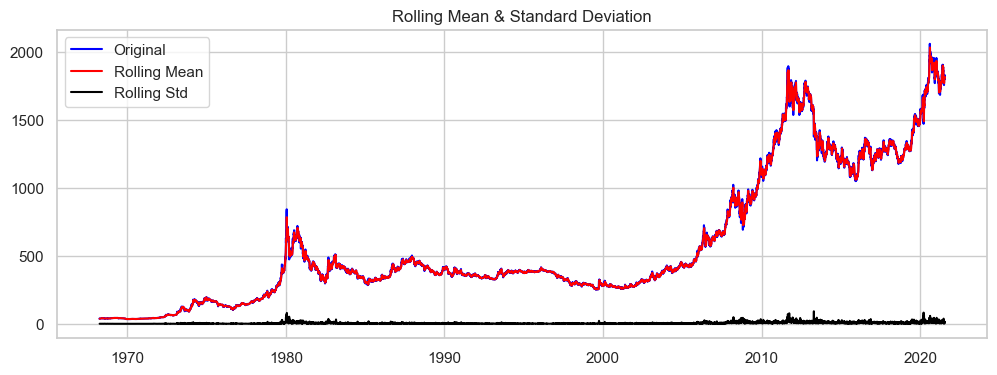

<Figure size 8000x1000 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                     0.596911
p-value                            0.987539
#Lags Used                        41.000000
Number of Observations Used    13866.000000
Critical Value (1%)               -3.430822
Critical Value (5%)               -2.861748
Critical Value (10%)              -2.566881
dtype: float64


In [181]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=5).mean() 
    rolstd = timeseries.rolling(window=5).std()
    #Plot rolling statistics:
    plt.figure(figsize=(12,4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.figure(figsize=(80,10))
    plt.show(block=False)
    major_ticks = np.arange(0, 101, 20)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
test_stationarity(dfs)


In [187]:
df.columns

Index(['observation_date', 'GOLDAMGBD228NLBM', 'year', 'month'], dtype='object', name=1)

In [202]:
test_size = df[(df['year'] >= 2010) & (df['year'] <= 2021)].shape[0]
test_size

3014

In [203]:
df.tail()

1     observation_date  GOLDAMGBD228NLBM  year  month
13903       2021-07-15       1832.000000  2021      7
13904       2021-07-16       1822.000000  2021      7
13905       2021-07-19       1803.250000  2021      7
13906       2021-07-20       1815.300049  2021      7
13907       2021-07-21       1805.900024  2021      7

In [210]:
df[(df['year'] >= 2010) & (df['year'] <= 2021)].shape[0]

3014

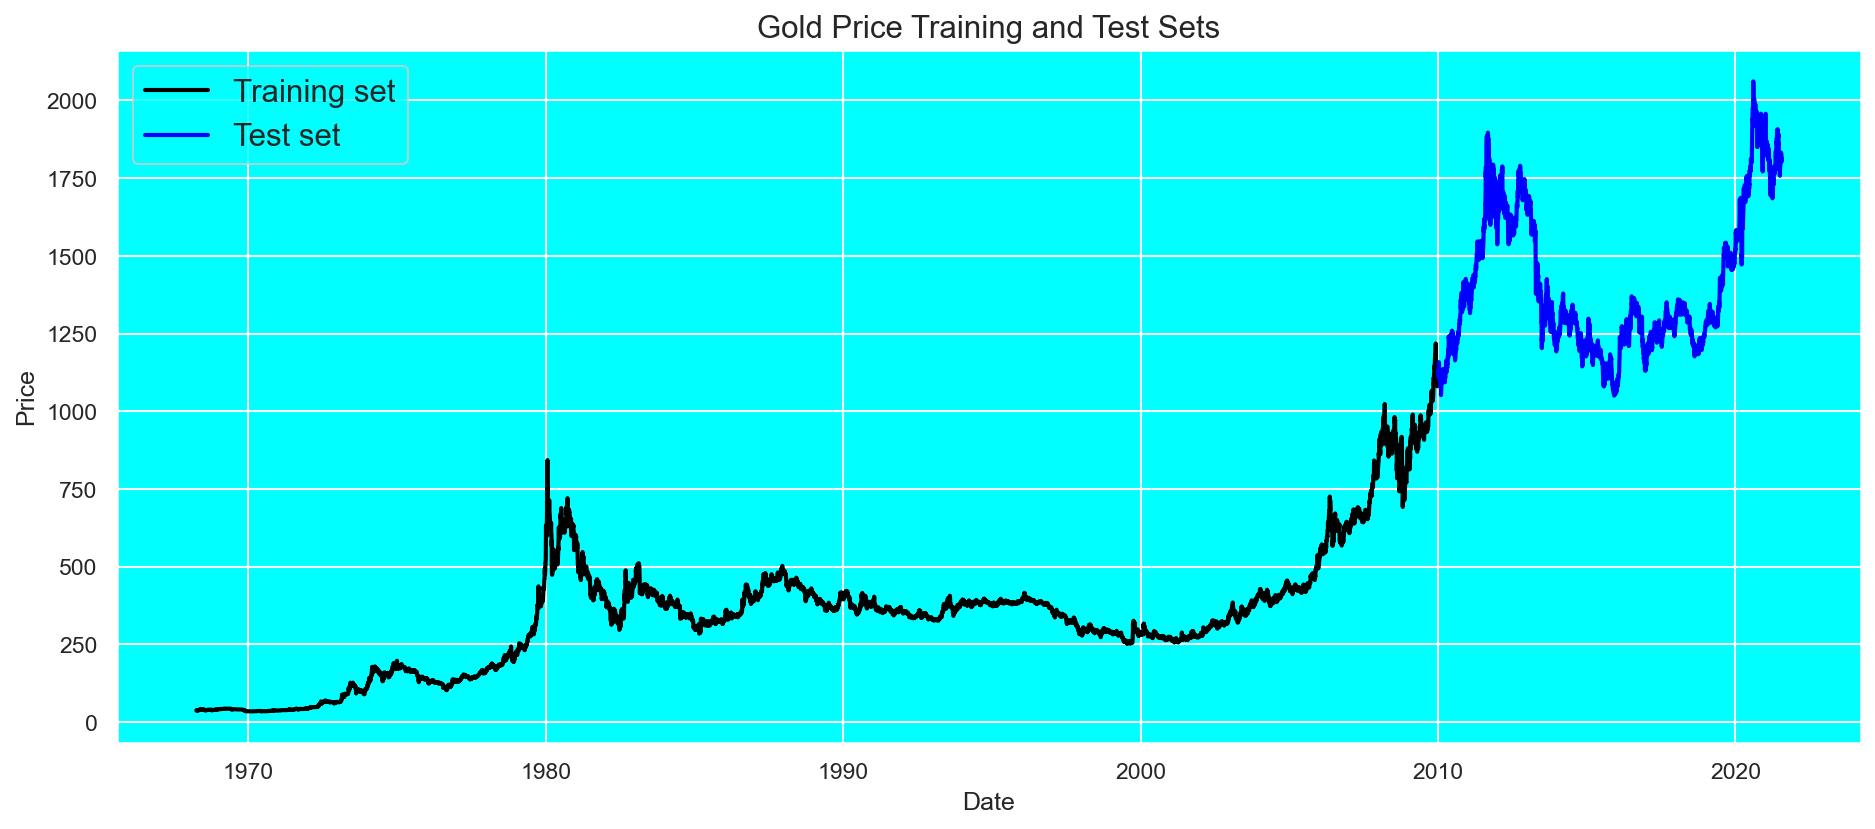

In [205]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'cyan'
plt.rc('axes',edgecolor='white')
plt.plot(df.observation_date[:-test_size], df.GOLDAMGBD228NLBM[:-test_size], color='black', lw=2)
plt.plot(df.observation_date[-test_size:], df.GOLDAMGBD228NLBM[-test_size:], color='blue', lw=2)
plt.title('Gold Price Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [206]:
scaler = MinMaxScaler()
scaler.fit(df.GOLDAMGBD228NLBM.values.reshape(-1,1))

MinMaxScaler()

The use of prior time steps to predict the next time step is called sliding window. In this way, time series data can be expressed as supervised learning. We can do this by using previous time steps as input variables and use the next time step as the output variable. The number of previous time steps is called the window width. Here we set window width to 60. Therefore, X_train and X_test will be nested lists containing lists of 60 time-stamp prices. y_train and y_test are also lists of gold prices containing the next day's gold price corresponds to each list in X_train and X_test respectively:

In [207]:
window_size = 60

train_data = df.GOLDAMGBD228NLBM[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [208]:
test_data = df.GOLDAMGBD228NLBM[-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [209]:
df.GOLDAMGBD228NLBM[-test_size-60:].shape

(3074,)

In [211]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [212]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [213]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [215]:
len(df.GOLDAMGBD228NLBM[:-test_size])

10894

In [216]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [217]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (10834, 60, 1)
y_train Shape:  (10834, 1)
X_test Shape:   (3014, 60, 1)
y_test Shape:   (3014, 1)


In [219]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 64, return_sequences=True)(input1)  
    x = Dropout(0.2)(x)
    x = LSTM(units = 64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()
    
    return model

In [221]:
model = define_model()
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 64)            16896     
                                                                 
 dropout_3 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_4 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0   

MAPE (Mean Absolute Percentage Error) metric:

In [222]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test) 

95/95 [==============================] - 5s 33ms/step


In [223]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

In [224]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.1398361623287201
Test MAPE: 0.5143012
Test Accuracy: 0.4856988191604614


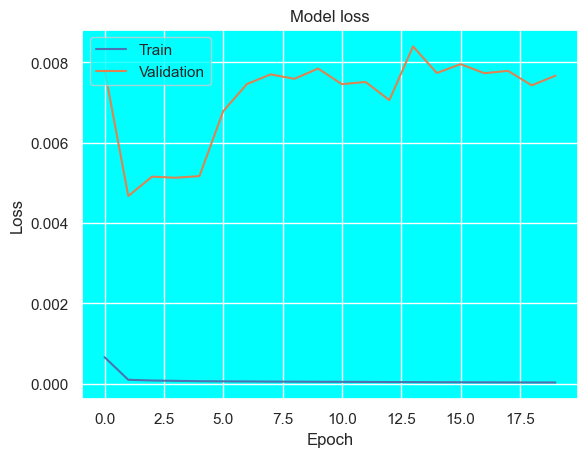

In [230]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(color='white')
plt.show()

In [226]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

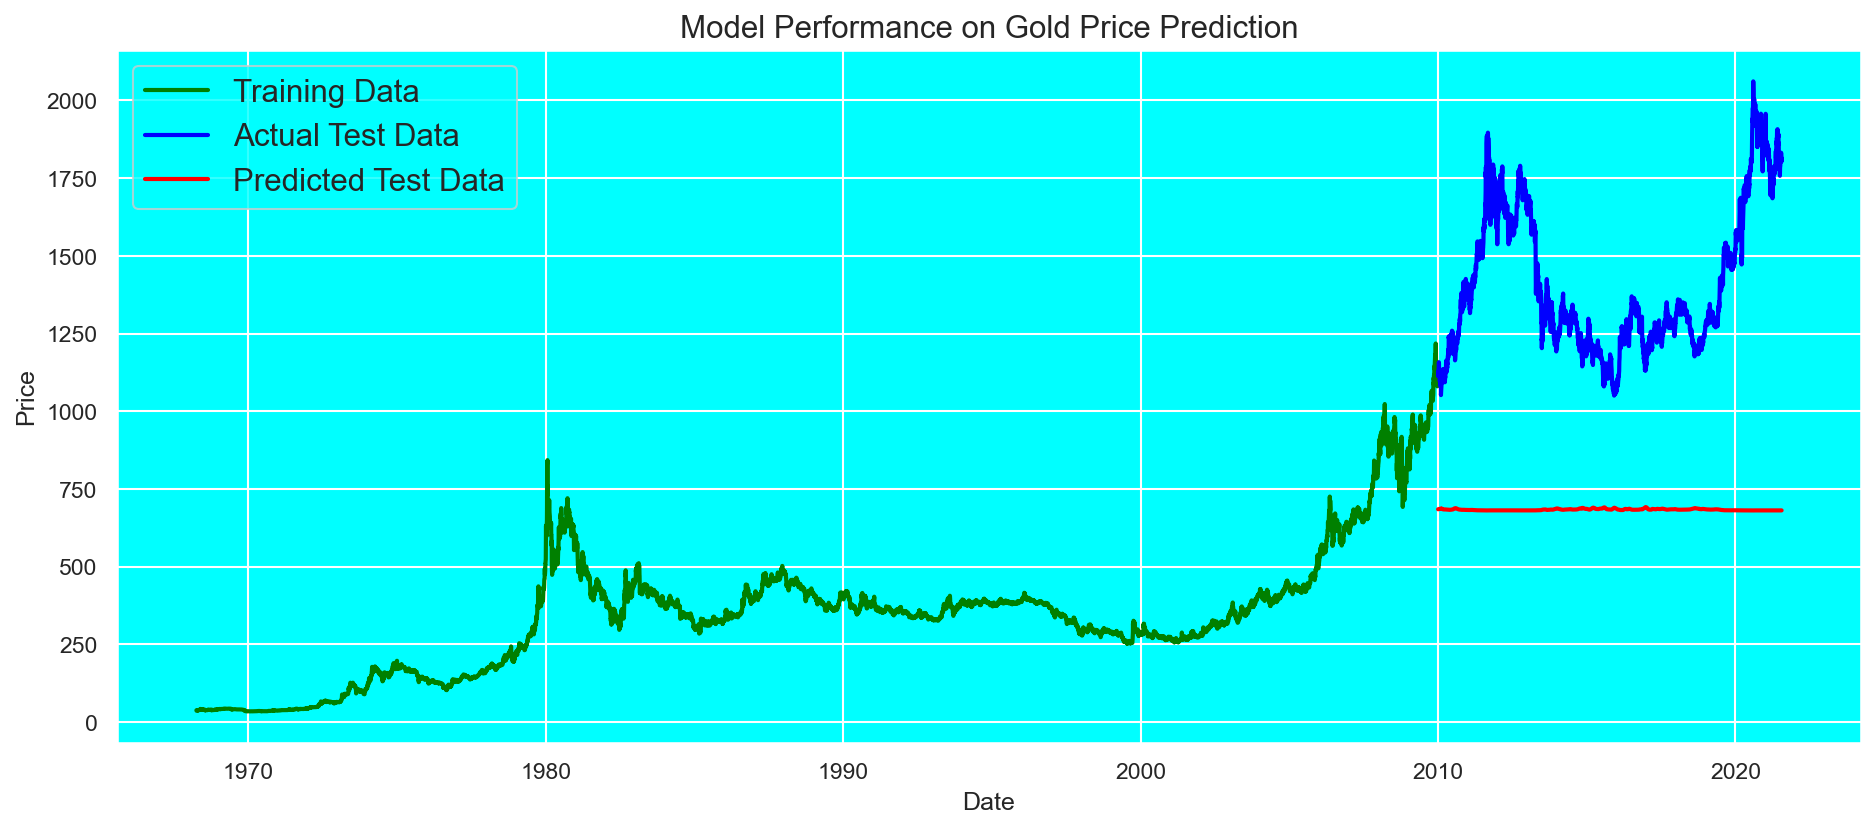

In [228]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'cyan'
plt.rc('axes',edgecolor='white')
plt.plot(df['observation_date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='green', lw=2)
plt.plot(df['observation_date'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['observation_date'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Model Performance on Gold Price Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()